In [498]:
import random

# Set a seed for reproducibility
random.seed(42)

class Vehicle:
    def __init__(self, id):
        self.id = id
        self.speed = random.randint(20, 80)  # Random speed between 0 and 80
        self.is_witness = False
        self.vote_for_vehicle_id = None  # ID of the vehicle the witness believes is at fault
        self.speaker_id = None  # Speaker ID prediction

def simulate_vehicles(num_vehicles, num_witnesses, speed_threshold):
    vehicles = [Vehicle(i) for i in range(num_vehicles)]

    # Randomly choose two vehicles to be involved in an accident
    accident_vehicles = random.sample(range(num_vehicles), 2)

    # Randomly select a subset of other vehicles to be witnesses
    witness_vehicles = random.sample(set(range(num_vehicles)) - set(accident_vehicles), num_witnesses)

    # Assign witness status, voting decision, and generate speaker ID for accident vehicles
    for vehicle in vehicles:
        if vehicle.id in witness_vehicles:
            vehicle.is_witness = True
            # Witness votes for one of the accident vehicles based on some logic (e.g., random choice here)
            vehicle.vote_for_vehicle_id = random.choice(accident_vehicles)
        elif vehicle.id in accident_vehicles:
            vehicle.speaker_id = f"SpeakerID_{vehicle.id}"  # Generate a unique speaker ID

    return vehicles, accident_vehicles, witness_vehicles

In [499]:
# Configuration

num_vehicles = 10
num_witnesses = 6
speed_threshold = 60
vehicles, accident_vehicles, witness_vehicles = simulate_vehicles(num_vehicles, num_witnesses, speed_threshold)

# Printing out the results for demonstration purposes
print("Accident Vehicles:", accident_vehicles)
print("Witness Vehicles:", [v.id for v in vehicles if v.is_witness])
for v in vehicles:
    if v.is_witness:
        print(f"Vehicle {v.id} voted for Vehicle {v.vote_for_vehicle_id}")
    elif v.id in accident_vehicles:
        print(f"Vehicle {v.id} has Speaker ID {v.speaker_id}")


Accident Vehicles: [8, 1]
Witness Vehicles: [0, 2, 5, 6, 7, 9]
Vehicle 0 voted for Vehicle 8
Vehicle 1 has Speaker ID SpeakerID_1
Vehicle 2 voted for Vehicle 8
Vehicle 5 voted for Vehicle 1
Vehicle 6 voted for Vehicle 8
Vehicle 7 voted for Vehicle 1
Vehicle 8 has Speaker ID SpeakerID_8
Vehicle 9 voted for Vehicle 1


C:\Users\Judith989\AppData\Local\Temp\ipykernel_30444\284075037.py:21: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  witness_vehicles = random.sample(set(range(num_vehicles)) - set(accident_vehicles), num_witnesses)


In [500]:
for vehicle in vehicles:
    # Prepare speaker ID info for accident vehicles
    speaker_id_info = f", Speaker ID: {vehicle.speaker_id}" if vehicle.speaker_id else ""

    # Prepare voting info for witness vehicles
    if vehicle.is_witness:
        vote_info = f"Voted for Vehicle ID: {vehicle.vote_for_vehicle_id}"
    else:
        vote_info = "Did not vote"

    # Print vehicle details
    print(f"Vehicle ID: {vehicle.id}, Speed: {vehicle.speed}, Is Witness: {vehicle.is_witness}, {vote_info}{speaker_id_info}")


Vehicle ID: 0, Speed: 60, Is Witness: True, Voted for Vehicle ID: 8
Vehicle ID: 1, Speed: 27, Is Witness: False, Did not vote, Speaker ID: SpeakerID_1
Vehicle ID: 2, Speed: 21, Is Witness: True, Voted for Vehicle ID: 8
Vehicle ID: 3, Speed: 67, Is Witness: False, Did not vote
Vehicle ID: 4, Speed: 37, Is Witness: False, Did not vote
Vehicle ID: 5, Speed: 35, Is Witness: True, Voted for Vehicle ID: 1
Vehicle ID: 6, Speed: 34, Is Witness: True, Voted for Vehicle ID: 8
Vehicle ID: 7, Speed: 28, Is Witness: True, Voted for Vehicle ID: 1
Vehicle ID: 8, Speed: 67, Is Witness: False, Did not vote, Speaker ID: SpeakerID_8
Vehicle ID: 9, Speed: 26, Is Witness: True, Voted for Vehicle ID: 1


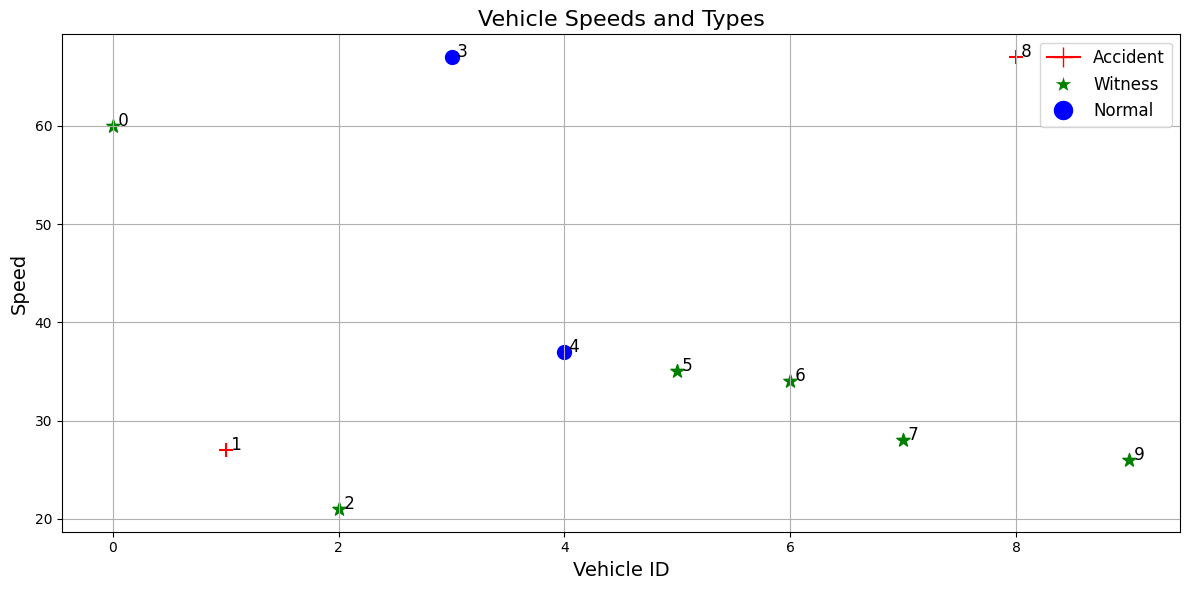

In [501]:
import matplotlib.pyplot as plt

def plot_vehicles(vehicles, accident_vehicles, witness_vehicles):
    # Set up the plot
    plt.figure(figsize=(12, 6))

    # Plot each vehicle
    for vehicle in vehicles:
        if vehicle.id in accident_vehicles:
            color, marker, label = 'red', '+', 'Accident'
        elif vehicle.id in witness_vehicles:
            color, marker, label = 'green', '*', 'Witness'
        else:
            color, marker, label = 'blue', 'o', 'Normal'

        plt.scatter(vehicle.id, vehicle.speed, color=color, marker=marker, s=100)  # Adjust marker size
        plt.text(vehicle.id, vehicle.speed, f" {vehicle.id}", fontsize=12)  # Adjust font size for vehicle ID text

    # Labeling the plot
    plt.xlabel('Vehicle ID', fontsize=14)  # Increase font size
    plt.ylabel('Speed', fontsize=14)  # Increase font size
    plt.title('Vehicle Speeds and Types', fontsize=16)  # Increase font size for title

    # Custom legend
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='+', color='r', markerfacecolor='red', markersize=15, label='Accident'),  # Increase legend marker size
        plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='green', markersize=15, label='Witness'),  # Increase legend marker size
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=15, label='Normal')   # Increase legend marker size
    ], fontsize=12)  # Increase font size for legend

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot the vehicles
plot_vehicles(vehicles, accident_vehicles, witness_vehicles)


# Blockchain Integration

## Install web3.py

In [502]:
#Install web3.py

#!pip install web3

In [503]:
#!pip install protobuf --upgrade

In [504]:
#!pip install --force-reinstall jsonschema==3.2.0

## Connect to Ethereum Blockchain

In [505]:
from web3 import Web3

# Connect to Ganache
ganache_url = "HTTP://127.0.0.1:1256"  
web3 = Web3(Web3.HTTPProvider(ganache_url))

# Check if connected successfully
print("Connected to Ethereum blockchain:", web3.is_connected())


Connected to Ethereum blockchain: True


## Deploy the smart contract

In [506]:
# Enter contract's ABI and bytecode
contract_abi = '''
[
	{
		"anonymous": false,
		"inputs": [
			{
				"indexed": false,
				"internalType": "uint256",
				"name": "vehicleID",
				"type": "uint256"
			},
			{
				"indexed": false,
				"internalType": "string",
				"name": "speakerID",
				"type": "string"
			}
		],
		"name": "SpeakerIDRecorded",
		"type": "event"
	},
	{
		"anonymous": false,
		"inputs": [
			{
				"indexed": false,
				"internalType": "uint256",
				"name": "vehicleID",
				"type": "uint256"
			}
		],
		"name": "VoteRecorded",
		"type": "event"
	},
	{
		"anonymous": false,
		"inputs": [],
		"name": "VotesReset",
		"type": "event"
	},
	{
		"constant": true,
		"inputs": [],
		"name": "getVehicleWithMostVotes",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "vehicleID",
				"type": "uint256"
			},
			{
				"internalType": "uint256",
				"name": "voteCount",
				"type": "uint256"
			}
		],
		"payable": false,
		"stateMutability": "view",
		"type": "function"
	},
	{
		"constant": false,
		"inputs": [
			{
				"internalType": "uint256",
				"name": "vehicleID",
				"type": "uint256"
			},
			{
				"internalType": "string",
				"name": "speakerID",
				"type": "string"
			}
		],
		"name": "recordSpeakerID",
		"outputs": [],
		"payable": false,
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"constant": false,
		"inputs": [
			{
				"internalType": "uint256",
				"name": "vehicleID",
				"type": "uint256"
			}
		],
		"name": "recordVote",
		"outputs": [],
		"payable": false,
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"constant": false,
		"inputs": [],
		"name": "resetVotes",
		"outputs": [],
		"payable": false,
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"constant": true,
		"inputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"name": "speakerIDs",
		"outputs": [
			{
				"internalType": "string",
				"name": "",
				"type": "string"
			}
		],
		"payable": false,
		"stateMutability": "view",
		"type": "function"
	},
	{
		"constant": true,
		"inputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"name": "votesForVehicles",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"payable": false,
		"stateMutability": "view",
		"type": "function"
	}
]
    '''
contract_bytecode = "608060405234801561001057600080fd5b50610605806100206000396000f3fe608060405234801561001057600080fd5b50600436106100625760003560e01c8063082e798e1461006757806327686c1d1461008c5780638430c6db146100ba5780639de57c891461017f578063b9830ff1146101c1578063ef0750af146101cb575b600080fd5b61006f610272565b604051808381526020018281526020019250505060405180910390f35b6100b8600480360360208110156100a257600080fd5b81019080803590602001909291905050506102d4565b005b61017d600480360360408110156100d057600080fd5b8101908080359060200190929190803590602001906401000000008111156100f757600080fd5b82018360208201111561010957600080fd5b8035906020019184600183028401116401000000008311171561012b57600080fd5b91908080601f016020809104026020016040519081016040528093929190818152602001838380828437600081840152601f19601f820116905080830192505050505050509192919290505050610330565b005b6101ab6004803603602081101561019557600080fd5b8101908080359060200190929190505050610400565b6040518082815260200191505060405180910390f35b6101c9610418565b005b6101f7600480360360208110156101e157600080fd5b810190808035906020019092919050505061047b565b6040518080602001828103825283818151815260200191508051906020019080838360005b8381101561023757808201518184015260208101905061021c565b50505050905090810190601f1680156102645780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b6000806000806000600190505b600a81116102c757816000808381526020019081526020016000205411156102ba578092506000808281526020019081526020016000205491505b808060010191505061027f565b5081819350935050509091565b600080828152602001908152602001600020600081548092919060010191905055507f153a9c4eefc8a9e0c657da854fcd9db9f342fbe394b4016529530c6344c7e396816040518082815260200191505060405180910390a150565b8060016000848152602001908152602001600020908051906020019061035792919061052b565b507fb9dacff689f899791e4eede12612d4c16e937cbee48711d475a086593ba75d0f82826040518083815260200180602001828103825283818151815260200191508051906020019080838360005b838110156103c15780820151818401526020810190506103a6565b50505050905090810190601f1680156103ee5780820380516001836020036101000a031916815260200191505b50935050505060405180910390a15050565b60006020528060005260406000206000915090505481565b6000600190505b600a811161044c57600080600083815260200190815260200160002081905550808060010191505061041f565b507f181116b640e6a324b012ab99d433f09debd8232185d611ebed62cfb16f06a4c460405160405180910390a1565b60016020528060005260406000206000915090508054600181600116156101000203166002900480601f0160208091040260200160405190810160405280929190818152602001828054600181600116156101000203166002900480156105235780601f106104f857610100808354040283529160200191610523565b820191906000526020600020905b81548152906001019060200180831161050657829003601f168201915b505050505081565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f1061056c57805160ff191683800117855561059a565b8280016001018555821561059a579182015b8281111561059957825182559160200191906001019061057e565b5b5090506105a791906105ab565b5090565b6105cd91905b808211156105c95760008160009055506001016105b1565b5090565b9056fea265627a7a72315820d9dfac38082ee29e48b06586164764571b9a93cfd08cba7246e053f9c01c1d1964736f6c63430005110032"

In [507]:
from datetime import datetime

# Deploy the contract
def deploy_contract():
    try:
        account = web3.eth.accounts[0]  # Account address from Ganache
        web3.eth.defaultAccount = account

        # Convert the contract bytecode to a deployable format
        SpeakerIdentification = web3.eth.contract(abi=contract_abi, bytecode=contract_bytecode)
        
        # Submit the transaction that deploys the contract
        tx_hash = SpeakerIdentification.constructor().transact({'from': account, 'gas': 3000000}) # Sample gas limit
        tx_receipt = web3.eth.wait_for_transaction_receipt(tx_hash)  # Correct method

        # Create the contract instance with the newly-deployed address
        contract = web3.eth.contract(address=tx_receipt.contractAddress, abi=contract_abi)
        return contract
    except Exception as e:
        print(f"An error occurred: {e}")

# Function to record a vote with latency and gas cost calculation
def record_vote(contract, vehicle_id):
    try:
        tx_sent_time = datetime.now()
        tx_hash = contract.functions.recordVote(vehicle_id).transact({'from': web3.eth.defaultAccount})
        tx_receipt = web3.eth.wait_for_transaction_receipt(tx_hash)
        tx_receipt_time = datetime.now()

        # Fetch the transaction to get the gas price
        tx = web3.eth.get_transaction(tx_hash)
        gas_cost = tx_receipt.gasUsed * tx.gasPrice

        latency = (tx_receipt_time - tx_sent_time).total_seconds()

        return tx_receipt, latency, web3.from_wei(gas_cost, 'ether')
    except Exception as e:
        print(f"Error recording vote: {e}")
        return None, None, None

# Function to record a speaker ID with latency and gas cost calculation
def record_speaker_id(contract, vehicle_id, speaker_id):
    try:
        tx_sent_time = datetime.now()
        tx_hash = contract.functions.recordSpeakerID(vehicle_id, speaker_id).transact({'from': web3.eth.defaultAccount})
        tx_receipt = web3.eth.wait_for_transaction_receipt(tx_hash)
        tx_receipt_time = datetime.now()

        # Fetch the transaction to get the gas price
        tx = web3.eth.get_transaction(tx_hash)
        gas_cost = tx_receipt.gasUsed * tx.gasPrice

        latency = (tx_receipt_time - tx_sent_time).total_seconds()

        return tx_receipt, latency, web3.from_wei(gas_cost, 'ether')
    except Exception as e:
        print(f"Error recording speaker ID: {e}")
        return None, None, None

# Deploy and get the contract instance
contract = deploy_contract()

# Record votes and speaker IDs for the simulated vehicles
if contract:
    # Record votes
    for vehicle in vehicles:
        if vehicle.is_witness:
            receipt, latency, gas_cost_in_ether = record_vote(contract, vehicle.vote_for_vehicle_id)
            if receipt:
                print(f"Vote for Vehicle ID {vehicle.vote_for_vehicle_id} recorded in transaction: {receipt.transactionHash.hex()}")
                print(f"Transaction latency: {latency} seconds, Gas cost: {gas_cost_in_ether} ether")

    # Record speaker IDs for accident vehicles
    for vehicle in vehicles:
        if vehicle.id in accident_vehicles:
            receipt, latency, gas_cost_in_ether = record_speaker_id(contract, vehicle.id, vehicle.speaker_id)
            if receipt:
                print(f"Speaker ID for Vehicle ID {vehicle.id} recorded in transaction: {receipt.transactionHash.hex()}")
                print(f"Transaction latency: {latency} seconds, Gas cost: {gas_cost_in_ether} ether")
else:
    print("Contract deployment failed")


Vote for Vehicle ID 8 recorded in transaction: 0x04d1705a0377e766a07cd458752f3b97c7f2c729e70697de3d265be57894d374
Transaction latency: 0.062914 seconds, Gas cost: 4.4714E-13 ether
Vote for Vehicle ID 8 recorded in transaction: 0x07aafc78e672b487ae4f2a5148f013644d4717ee08ac761ab35c020071b267a0
Transaction latency: 0.047031 seconds, Gas cost: 2.7614E-13 ether
Vote for Vehicle ID 1 recorded in transaction: 0xc97f94c751458ca6c3dad35043676c3101e89dd9d03752b57d72fefa951342bd
Transaction latency: 0.046 seconds, Gas cost: 4.4714E-13 ether
Vote for Vehicle ID 8 recorded in transaction: 0x347e5cf1e4411d60f02e55185df7b8aa3f88401be1302093a41da38d644e428a
Transaction latency: 0.045 seconds, Gas cost: 2.7614E-13 ether
Vote for Vehicle ID 1 recorded in transaction: 0xa242b47ecd5924bb2a1debe24ec89431126ea9b79c02f0ddea07427521df09b2
Transaction latency: 0.039998 seconds, Gas cost: 2.7614E-13 ether
Vote for Vehicle ID 1 recorded in transaction: 0x77d73e8a68989bc39db52712633092661262b37681e1c215621c2a5a3

## Interact with the Contract

In [508]:
# Assuming setup and contract deployment are done
# Function to get the vehicle with the most votes

def get_vehicle_with_most_votes(contract):
    try:
        start_time = datetime.now()
        vehicle_id, vote_count = contract.functions.getVehicleWithMostVotes().call()
        end_time = datetime.now()
        latency = (end_time - start_time).total_seconds()
        return vehicle_id, vote_count, latency
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None, None

def get_speaker_id(contract, vehicle_id):
    try:
        start_time = datetime.now()
        speaker_id = contract.functions.speakerIDs(vehicle_id).call()
        end_time = datetime.now()
        latency = (end_time - start_time).total_seconds()
        return speaker_id, latency
    except Exception as e:
        print(f"Error retrieving speaker ID for Vehicle ID {vehicle_id}: {e}")
        return None, None

# Assuming the contract instance 'contract' is already created and connected

# Get and print the leading vehicle after all votes
leading_vehicle_id, leading_vote_count, latency2 = get_vehicle_with_most_votes(contract)
if leading_vehicle_id is not None:
    print(f"Vehicle with most votes: Vehicle ID {leading_vehicle_id} with {leading_vote_count} votes")
    print(f"Query latency: {latency2} seconds")

    # Get and print the speaker ID for the leading vehicle
    speaker_id, latency3 = get_speaker_id(contract, leading_vehicle_id)
    if speaker_id:
        print(f"Speaker ID for Vehicle ID {leading_vehicle_id}: {speaker_id}")
        print(f"Query latency: {latency3} seconds")
else:
    print("Unable to determine the vehicle with most votes.")

Vehicle with most votes: Vehicle ID 1 with 3 votes
Query latency: 0.016996 seconds
Speaker ID for Vehicle ID 1: SpeakerID_1
Query latency: 0.012 seconds


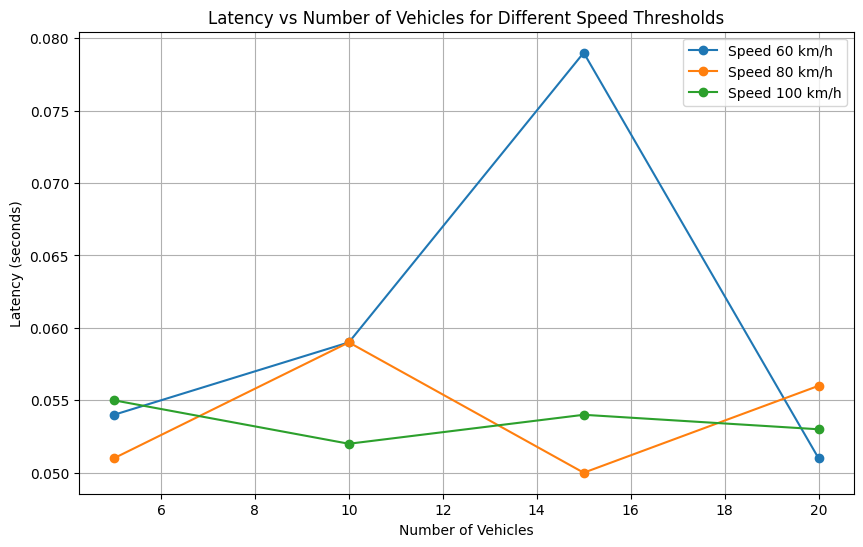

In [509]:
import matplotlib.pyplot as plt

# Data
speed_thresholds = [60, 60, 60, 60, 80, 80, 80, 80, 100, 100, 100, 100]
num_vehicles = [5, 10, 15, 20, 5, 10, 15, 20, 5, 10, 15, 20]
latencies = [0.054, 0.059, 0.079, 0.051, 0.051, 0.059, 0.050, 0.056, 0.055, 0.052, 0.054, 0.053]

# Group data by speed threshold
data_by_threshold = {}
for i, speed in enumerate(speed_thresholds):
    if speed not in data_by_threshold:
        data_by_threshold[speed] = {'num_vehicles': [], 'latencies': []}
    data_by_threshold[speed]['num_vehicles'].append(num_vehicles[i])
    data_by_threshold[speed]['latencies'].append(latencies[i])

# Plot
plt.figure(figsize=(10, 6))
for speed, data in data_by_threshold.items():
    plt.plot(data['num_vehicles'], data['latencies'], marker='o', label=f'Speed {speed} km/h')

plt.xlabel('Number of Vehicles')
plt.ylabel('Latency (seconds)')
plt.title('Latency vs Number of Vehicles for Different Speed Thresholds')
plt.legend()
plt.grid(True)
plt.show()


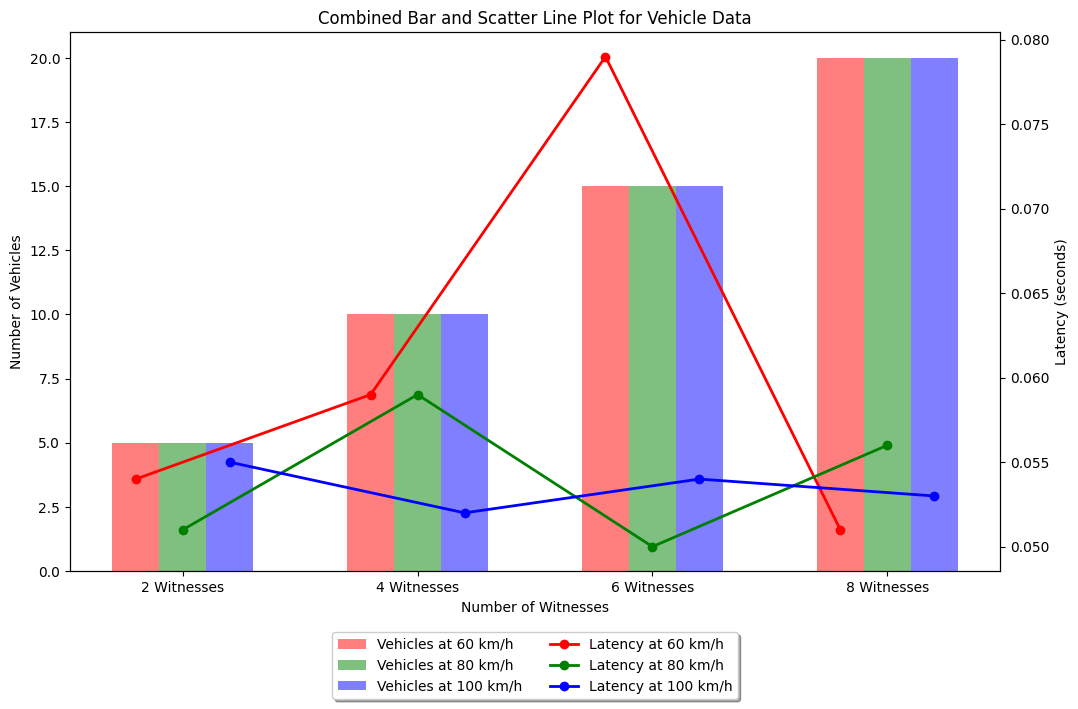

In [510]:
import matplotlib.pyplot as plt
import numpy as np

# Data
speed_thresholds = [60, 80, 100]
data = [
    (60, 5, 2, 0.054),
    (60, 10, 4, 0.059),
    (60, 15, 6, 0.079),
    (60, 20, 8, 0.051),
    (80, 5, 2, 0.051),
    (80, 10, 4, 0.059),
    (80, 15, 6, 0.050),
    (80, 20, 8, 0.056),
    (100, 5, 2, 0.055),
    (100, 10, 4, 0.052),
    (100, 15, 6, 0.054),
    (100, 20, 8, 0.053)
]

# Group data by speed threshold
data_by_threshold = {speed: {'num_vehicles': [], 'latencies': [], 'witnesses': []} for speed in speed_thresholds}
for speed, vehicles, witnesses, latency in data:
    data_by_threshold[speed]['num_vehicles'].append(vehicles)
    data_by_threshold[speed]['latencies'].append(latency)
    data_by_threshold[speed]['witnesses'].append(witnesses)

# Plot configuration
colors = ['red', 'green', 'blue']
bar_width = 0.2  # Width of the bar
indices = np.arange(len(data_by_threshold[60]['num_vehicles']))  # Indices for bar groups

# Create the figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Bar plot for the number of vehicles with transparency
for i, (speed, data) in enumerate(data_by_threshold.items()):
    ax1.bar(indices + i * bar_width, 
            data['num_vehicles'], 
            bar_width, 
            label=f'Vehicles at {speed} km/h', 
            color=colors[i], 
            alpha=0.5)

# Configure the bar plot axis
ax1.set_xlabel('Number of Witnesses')
ax1.set_ylabel('Number of Vehicles', color='black')
ax1.set_xticks(indices + bar_width)
ax1.set_xticklabels([f'{witnesses} Witnesses' for witnesses in sorted_witnesses])

# Scatter line plot for latency with respect to different speed thresholds
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
for i, (speed, data) in enumerate(data_by_threshold.items()):
    ax2.plot(indices + i * bar_width, 
             data['latencies'], 
             marker='o', 
             linestyle='-', 
             linewidth=2,  # Thicker line for better visibility
             color=colors[i], 
             label=f'Latency at {speed} km/h')

# Configure the line plot axis
ax2.set_ylabel('Latency (seconds)')

# Combined legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)

plt.title('Combined Bar and Scatter Line Plot for Vehicle Data')

plt.show()